FORM THE DATAFRAME

In [41]:
import nbformat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_json('C:/Users/Monster/Documents/spoti_data_use_in_project/Spotify Extended Streaming History/Streaming_History_Audio_2021-2022_3.json')
df2 = pd.read_json('C:/Users/Monster/Documents/spoti_data_use_in_project/Spotify Extended Streaming History/Streaming_History_Audio_2022-2023_4.json')


df = pd.concat([df1, df2])
df.head()


,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-05-30T15:17:09Z,dcjqx30y5c43hamm6jxn33gbz,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",85133,TR,176.227.44.225,unknown,Y 3,suburban,Y 3,...,None,None,None,trackdone,trackdone,True,NaN,False,1622387742745,False
1,2021-05-30T15:19:39Z,dcjqx30y5c43hamm6jxn33gbz,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",149342,TR,176.227.44.225,unknown,Masked Up and Iced Out,6roke 6oy Six,Masked Up and Iced Out,...,None,None,None,trackdone,trackdone,True,NaN,False,1622387828374,False
2,2021-05-30T19:54:56Z,dcjqx30y5c43hamm6jxn33gbz,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",147011,TR,78.191.159.86,unknown,PAID MY DUES,NF,PAID MY DUES,...,None,None,None,trackdone,unexpected-exit-while-paused,True,NaN,False,1622387978252,False
3,2021-05-31T11:16:59Z,dcjqx30y5c43hamm6jxn33gbz,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",232533,TR,176.227.59.154,unknown,Six Days - Remix,DJ Shadow,Six Days,...,None,None,None,clickrow,trackdone,True,NaN,False,1622459585373,False
4,2021-05-31T11:17:15Z,dcjqx30y5c43hamm6jxn33gbz,"Android OS 10 API 29 (Xiaomi, Redmi Note 9S)",15697,TR,176.227.59.154,unknown,100 Metre Dash,DJ Shadow,Six Days,...,None,None,None,trackdone,endplay,True,NaN,False,1622459817552,False


DISPLAY FIRST 5 SONGS WITH NECCESSAY INFORMATION

In [42]:
# Select the columns you need
selected_columns = ['ts', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name', 'spotify_track_uri']

# Create a new DataFrame with selected columns
my_df = df[selected_columns]

# Display the first few rows of the new DataFrame
my_df.head()


,ts,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri
0,2021-05-30T15:17:09Z,Y 3,suburban,Y 3,spotify:track:2OfUPZk8wQrYHNv82sge0p
1,2021-05-30T15:19:39Z,Masked Up and Iced Out,6roke 6oy Six,Masked Up and Iced Out,spotify:track:12NxdX4fiXWHZrqEPne08y
2,2021-05-30T19:54:56Z,PAID MY DUES,NF,PAID MY DUES,spotify:track:18czZN7uruOjftj71Kt8oj
3,2021-05-31T11:16:59Z,Six Days - Remix,DJ Shadow,Six Days,spotify:track:3IEG65Fi7Zm8cQEEG3uJ4H
4,2021-05-31T11:17:15Z,100 Metre Dash,DJ Shadow,Six Days,spotify:track:3hCyqeiRs3gVy47799GuT6


DISPLAY THE FEATURES OF THE FIRST 10 SONGS USING SPOTIFY WEB API

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time

# Replace these with your Spotify API credentials
CLIENT_ID = '4f45aac1831a4c8db51bd28974b1a048'
CLIENT_SECRET = '498ee10ecea7407785864fbaba77ff06'
REDIRECT_URI = 'http://localhost:8866/callback'

# Set up Spotipy with OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=REDIRECT_URI,
                                               scope='user-read-private'))

# Assume df is your DataFrame with the 'spotify_track_uri' column
# Take only the first 10 songs
df_first_10 = df.head(10)

# Create a list to store track IDs
track_ids = []

for index, row in df_first_10.iterrows():
    track_uri = row['spotify_track_uri']
    
    # Get the track ID from the URI (the part after 'spotify:track:')
    track_id = track_uri.split(':')[-1]
    track_ids.append(track_id)

try:
    # Get the audio features for the list of track IDs
    audio_features_list = sp.audio_features(track_ids)
    
    # Now audio_features_list is a list of dictionaries containing the audio features for each track
    df_audio_features = pd.DataFrame(audio_features_list)
    
    # Display the DataFrame
    print(df_audio_features)
        
except spotipy.SpotifyException as e:
    if e.http_status == 429 and 'Retry-After' in e.headers:
        retry_after_seconds = int(e.headers['Retry-After'])
        print(f"Rate limited. Waiting for {retry_after_seconds} seconds before retrying.")
        time.sleep(retry_after_seconds)
        # Retry the request after waiting
        audio_features_list = sp.audio_features(track_ids)
        df_audio_features = pd.DataFrame(audio_features_list)
        print(df_audio_features)
    else:
        print(f"Error: {e}")


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.725   0.548    1   -10.178     1       0.1690       0.08140   
1         0.767   0.753   10    -4.663     1       0.3200       0.01290   
2         0.812   0.784    2    -4.208     1       0.2480       0.13600   
3         0.699   0.909    5    -6.720     0       0.2360       0.13000   
4         0.634   0.993    6    -5.516     1       0.0435       0.03160   
5         0.769   0.829    0    -5.228     1       0.0661       0.00948   
6         0.660   0.789    7    -5.143     1       0.3640       0.05270   
7         0.708   0.934   10    -3.512     0       0.1330       0.11000   
8         0.963   0.643    1    -5.785     0       0.1170       0.05070   
9         0.769   0.811   10    -4.162     0       0.2280       0.02340   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000025    0.2570    0.565  158.143  audio_features   
1          0.019000    0.5780    0.315  

CHART OF LISTENING TIME BY MONTHS

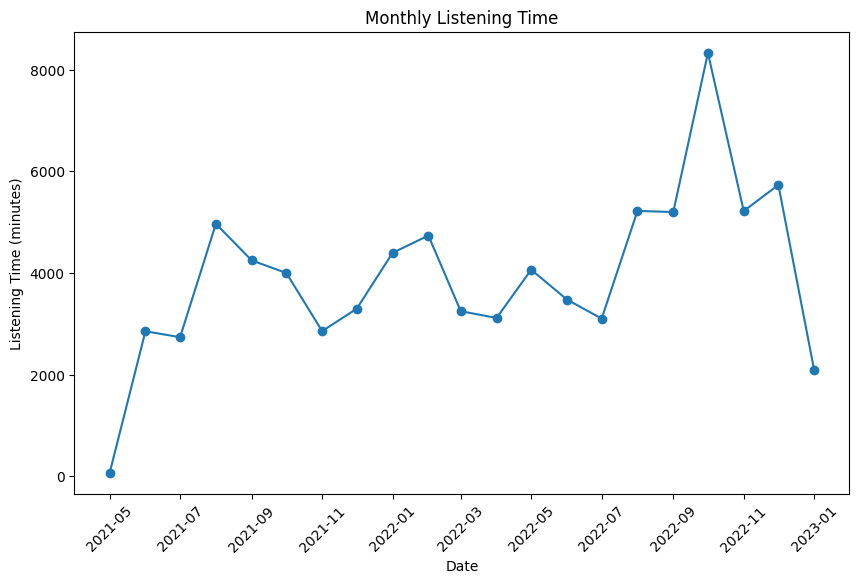

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming your data is stored in a DataFrame named df
# Convert timestamp to datetime objects
df['timestamp'] = pd.to_datetime(df['ts'], format='%Y-%m-%dT%H:%M:%SZ')

# Extract month and year
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Group by month and year, summing ms_played
monthly_data = df.groupby(['year', 'month'])['ms_played'].sum().reset_index()

# Convert year and month to a datetime object for better plotting
monthly_data['date'] = monthly_data.apply(lambda row: datetime(row['year'], row['month'], 1), axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['date'], monthly_data['ms_played'] / (1000 * 60), marker='o', linestyle='-')
plt.title('Monthly Listening Time')
plt.xlabel('Date')
plt.ylabel('Listening Time (minutes)')
plt.xticks(rotation=45)
plt.show()


DAILY AVERAGE LISTENING TIME

Daily Average Listening Time: 139.97 minutes per day


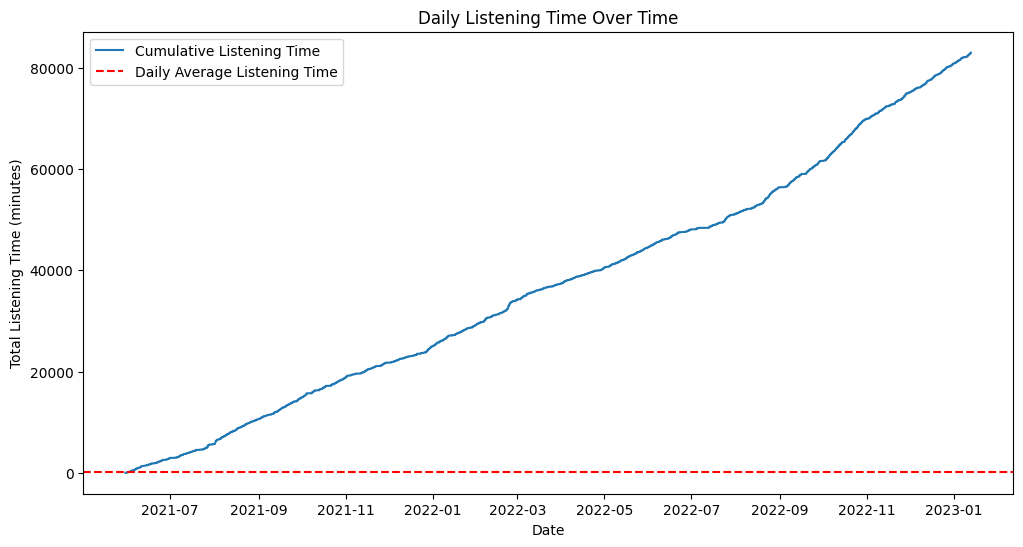

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert the timestamp to a datetime object if it's in string format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate total listening time in minutes
total_listening_time_minutes = df['ms_played'].sum() / (1000 * 60)

# Determine the number of days
num_days = (df['timestamp'].max() - df['timestamp'].min()).days + 1

# Calculate the daily average
daily_average_minutes = total_listening_time_minutes / num_days

print(f"Daily Average Listening Time: {daily_average_minutes:.2f} minutes per day")
# Set a larger figure size
plt.figure(figsize=(12, 6))
# Create a line chart
plt.plot(df['timestamp'], df['ms_played'].cumsum() / (1000 * 60), label='Cumulative Listening Time')
plt.axhline(y=daily_average_minutes, color='r', linestyle='--', label='Daily Average Listening Time')

plt.xlabel('Date')
plt.ylabel('Total Listening Time (minutes)')
plt.title('Daily Listening Time Over Time')
plt.legend()
plt.show()


DAILY AVERAGE LISTENING TIME ON EXAM PERIODS

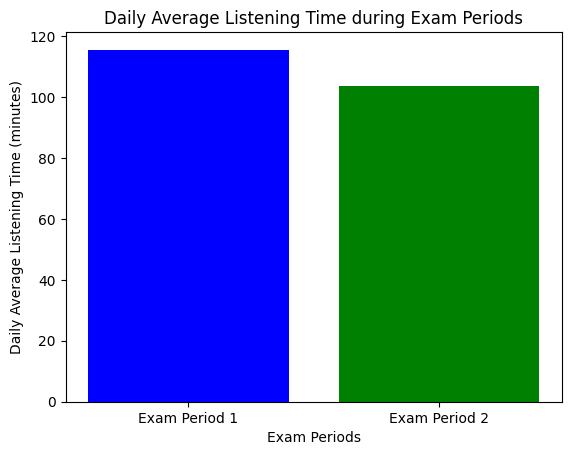

In [45]:
import pandas as pd

# Assuming df is your DataFrame

# Define the exam date ranges
exam_dates_1 = pd.date_range(start='2022-01-10', end='2022-01-22')  # Extended by one day
exam_dates_2 = pd.date_range(start='2022-06-11', end='2022-06-24')  # Extended by one day

# Filter rows within the exam date ranges
exam_data_1 = df[df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both')]
exam_data_2 = df[df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]

# Calculate total listening time in minutes for each exam period
total_listening_time_1 = exam_data_1['ms_played'].sum() / (1000 * 60)
total_listening_time_2 = exam_data_2['ms_played'].sum() / (1000 * 60)

# Determine the number of days for each exam period
num_days_1 = len(pd.date_range(start='2022-01-10', end='2022-01-22'))
num_days_2 = len(pd.date_range(start='2022-06-11', end='2022-06-24'))

# Calculate the daily average for each exam period
daily_average_minutes_1 = total_listening_time_1 / num_days_1
daily_average_minutes_2 = total_listening_time_2 / num_days_2

# Create a bar chart
exam_periods = ['Exam Period 1', 'Exam Period 2']
daily_averages = [daily_average_minutes_1, daily_average_minutes_2]

plt.bar(exam_periods, daily_averages, color=['blue', 'green'])
plt.xlabel('Exam Periods')
plt.ylabel('Daily Average Listening Time (minutes)')
plt.title('Daily Average Listening Time during Exam Periods')
plt.show()


COMPARING DIFFERENT PERIODS FOR LISTENING TIME

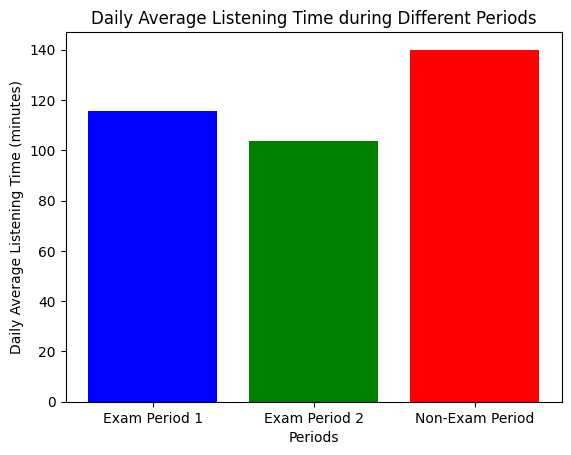

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the exam date ranges
exam_dates_1 = pd.date_range(start='2022-01-10', end='2022-01-22')  # Extended by one day
exam_dates_2 = pd.date_range(start='2022-06-11', end='2022-06-24')  # Extended by one day

# Filter rows within the exam date ranges
exam_data_1 = df[df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both')]
exam_data_2 = df[df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]

# Calculate total listening time in minutes for each exam period
total_listening_time_1 = exam_data_1['ms_played'].sum() / (1000 * 60)
total_listening_time_2 = exam_data_2['ms_played'].sum() / (1000 * 60)

# Determine the number of days for each exam period
num_days_1 = len(pd.date_range(start='2022-01-10', end='2022-01-22'))
num_days_2 = len(pd.date_range(start='2022-06-11', end='2022-06-24'))

# Calculate the daily average for each exam period
daily_average_minutes_1 = total_listening_time_1 / num_days_1
daily_average_minutes_2 = total_listening_time_2 / num_days_2

# Filter rows outside the exam date ranges
non_exam_data = df[~df['timestamp'].isin(exam_dates_1.union(exam_dates_2))]

# Calculate total listening time in minutes for the non-exam period
total_listening_time_non_exam = non_exam_data['ms_played'].sum() / (1000 * 60)

# Determine the number of days for the non-exam period
num_days_non_exam = len(pd.date_range(start=non_exam_data['timestamp'].min(), end=non_exam_data['timestamp'].max()))

# Calculate the daily average for the non-exam period
daily_average_minutes_non_exam = total_listening_time_non_exam / num_days_non_exam

# Create a bar chart
periods = ['Exam Period 1', 'Exam Period 2', 'Non-Exam Period']
daily_averages = [daily_average_minutes_1, daily_average_minutes_2, daily_average_minutes_non_exam]

plt.bar(periods, daily_averages, color=['blue', 'green', 'red'])
plt.xlabel('Periods')
plt.ylabel('Daily Average Listening Time (minutes)')
plt.title('Daily Average Listening Time during Different Periods')
plt.show()


CREATE PLAYLISTS WITH EXAM DATE SONGS

In [31]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import re

# Replace these with your Spotify API credentials
CLIENT_ID = '4f45aac1831a4c8db51bd28974b1a048'
CLIENT_SECRET = '498ee10ecea7407785864fbaba77ff06'
REDIRECT_URI = 'http://localhost:8866/callback'

# Set up Spotipy with OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope='playlist-modify-private'  # This scope allows creating and modifying private playlists
))

# Assuming df is your DataFrame and 'spotify_track_uri' is the column with the Spotify URIs
# Filter the DataFrame to only include songs listened to on exam dates
exam_songs = df[df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist()
exam_songs.extend(df[df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist())

# Filter out None values
exam_songs = list(filter(None, exam_songs))

# Print out the number of exam songs
print(f"Number of exam songs: {len(exam_songs)}")

# Batch the songs into groups of 100
song_batches = [exam_songs[i:i + 100] for i in range(0, len(exam_songs), 100)]

# For each batch of songs, create a new playlist and add the songs to it
for i, song_batch in enumerate(song_batches, start=1):
    try:
        # Create a new playlist
        playlist = sp.user_playlist_create(sp.me()['id'], f'Exam Songs Batch {i}', public=False)

        # Filter out None values from song_batch
        song_batch = list(filter(None, song_batch))

        # Add the songs to the playlist
        sp.playlist_add_items(playlist['id'], song_batch)
        print(f"Created playlist with ID: {playlist['id']}")
    
    except spotipy.SpotifyException as e:
        print(f"Error creating playlist: {e}")


Number of exam songs: 1111
Created playlist with ID: 4vmCVjCuRndSi7RW6WUpt2
Created playlist with ID: 54BTtIXI7oPTxnMZXd7yvm
Created playlist with ID: 1c71yIOCT7gDgvHoFz2P1V
Created playlist with ID: 296uCaW0ryRMSAbikT1078
Created playlist with ID: 5iG5VrTrL8HFuoMN6QIqMK
Created playlist with ID: 47ftKzhXQti9O29Zl5A08W
Created playlist with ID: 77qYVdP6Vp3IONOn15zVV7
Created playlist with ID: 5MRZBBzN9XNazUDTKzUzkx
Created playlist with ID: 3lMVjIRp8JIj0CVcmtxdBR
Created playlist with ID: 6UoZC59gxQtDMExv1JcReB
Created playlist with ID: 26udUrpNJrBPOevcFa10W5
Created playlist with ID: 4Asj9XcTlZSdgI9IhQIGck


DISPLAY THE NUMBER OF EXAM SONGS

In [13]:
# Assuming df is your DataFrame and 'spotify_track_uri' is the column with the Spotify URIs
# Filter the DataFrame to only include songs listened to on exam dates
exam_songs = df[df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist()
exam_songs.extend(df[df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist())



# Print out the number of exam songs
print(f"Number of exam songs: {len(exam_songs)}")

Number of exam songs: 1112


DISPLAY THE NUMBER OF NON-EXAM SONGS

In [47]:
# Assuming df is your DataFrame and 'spotify_track_uri' is the column with the Spotify URIs
# Filter the DataFrame to exclude songs listened to on exam dates
non_exam_songs = df[~df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both') & ~df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist()

# Filter out None values
non_exam_songs = list(filter(None, non_exam_songs))

# Print out the number of non-exam songs
print(f"Number of non-exam songs: {len(non_exam_songs)}")

Number of non-exam songs: 30626


CREATE PLAYLISTS WITH THE NONEXAM DATE SONGS

In [33]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import re

# Replace these with your Spotify API credentials
CLIENT_ID = '4f45aac1831a4c8db51bd28974b1a048'
CLIENT_SECRET = '498ee10ecea7407785864fbaba77ff06'
REDIRECT_URI = 'http://localhost:8866/callback'

# Set up Spotipy with OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope='playlist-modify-private'  # This scope allows creating and modifying private playlists
))

# Assuming df is your DataFrame and 'spotify_track_uri' is the column with the Spotify URIs
# Filter the DataFrame to exclude songs listened to on exam dates
non_exam_songs = df[~df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both') & ~df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]['spotify_track_uri'].apply(lambda x: x.split(':')[-1] if x is not None else None).tolist()

# Filter out None values
non_exam_songs = list(filter(None, non_exam_songs))

# Print out the number of non-exam songs
print(f"Number of non-exam songs: {len(non_exam_songs)}")

# Batch the songs into groups of 100
song_batches = [non_exam_songs[i:i + 100] for i in range(0, len(non_exam_songs), 100)]

# Create a folder for non-exam playlists
folder_name = 'NONEXAM SONG BATCHES'
folder_id = None

for i, song_batch in enumerate(song_batches, start=1):
    try:
        # Create a new playlist in the folder
        playlist_name = f'{folder_name} / Batch {i}'
        playlist = sp.user_playlist_create(sp.me()['id'], playlist_name, public=False)

        # If it's the first playlist, store the folder ID
        if folder_id is None:
            folder_id = playlist['id']
    
        # Filter out None values from song_batch
        song_batch = list(filter(None, song_batch))

        # Add the songs to the playlist
        sp.playlist_add_items(playlist['id'], song_batch)
        print(f"Created playlist with ID: {playlist['id']}")
    
    except spotipy.SpotifyException as e:
        print(f"Error creating playlist: {e}")

# Rename the folder to remove the batch number
sp.playlist_change_details(folder_id, name=folder_name)
print(f"Renamed folder to: {folder_name}")


Number of non-exam songs: 30626
Created playlist with ID: 2DRpNn4Ij47fxEXqxJLUb5
Created playlist with ID: 2y50OftY3LicmVCJDBeZ5G
Created playlist with ID: 54KgUogwkmXSZRzmEDzpLu
Created playlist with ID: 4fIDtHD14VaZOIxqB51ohk
Created playlist with ID: 4bKFpOeNXvJGQxq965BKDN
Created playlist with ID: 2FourYYpsbUf0kbyaLkboc
Created playlist with ID: 7joMyZSnN5lkx2qIU1kZuA
Created playlist with ID: 0kPmAe7160Nx04AvqLeSU2
Created playlist with ID: 4i7jZWrMrnpsMlzSdtsDEH
Created playlist with ID: 47DiX5MPaMHmq3QjArgwnh
Created playlist with ID: 2XF8oSYKwWp3LiLlhb9V4p
Created playlist with ID: 65bOSxeEXha6CFOSv0Fagi
Created playlist with ID: 1Vjjq7x2cJ3jCFbZkbjPir
Created playlist with ID: 7HCcPEpzWU7MGbv7kAAboK
Created playlist with ID: 3b7vchT1UEMmKdqPvie0Li
Created playlist with ID: 0V4zgYGHRR5FwGvnYvX8of
Created playlist with ID: 41CNzXjjoBrSkAmC6hYHoO
Created playlist with ID: 1961lifWCpJkVpizjMuJSn
Created playlist with ID: 2MUT79ZQbU4aaq2VHqcM1j
Created playlist with ID: 6jJ9pW0r9tg

SCRAPE THE CHOSIC WEBSITE FOR THE FEATURES TABLE(EXAM DATA)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
# File path of the HTML file
# I changed the name of the file to easily write the path :)
file_path = 'C:/Users/Monster/Desktop/cs210proj.html'

# Open the file
with open(file_path, 'r', encoding='utf-8') as f:
    webpage_content = f.read()

# Create a BeautifulSoup object and specify the parser
soup = bs4.BeautifulSoup(webpage_content, 'html.parser')

# Find the playlist table using the id attribute
playlist_table = soup.find('table', {'id': 'tracks-table'})
song_number = 1

# Initialize an empty list to store data
data = []

if playlist_table is not None:
    song_rows = playlist_table.find_all("tr")
    # Loop through each song row
    for song_row in song_rows:
        # Find all td elements in the song row
        td_elements = song_row.find_all("td")

        # Check if there are enough td elements
        if len(td_elements) >= 23:
            # Extract the song information
            
            song_name = td_elements[1].text
            artist_name = td_elements[2].text
            popularity = td_elements[3].text
            bpm = td_elements[4].text
            genres = td_elements[5].text
            parent_genres = td_elements[6].text
            album = td_elements[7].text
            album_date = td_elements[8].text
            time = td_elements[9].text
            dance = td_elements[10].text
            energy= td_elements[11].text
            acoustic= td_elements[12].text
            instrumental= td_elements[13].text
            happy= td_elements[14].text
            speech= td_elements[15].text
            live= td_elements[16].text
            loud= td_elements[17].text
            key= td_elements[18].text
            time_signature= td_elements[19].text
            added_at= td_elements[20].text
            spotify_track_id= td_elements[21].text
            album_label= td_elements[22].text
            camelot = td_elements[23].text
            # ... add more as needed
            # Find the img element and get the src attribute
            img_element = song_row.find("img", {"class": "track-table-img"})
            if img_element is not None:
                spotify_track_img = img_element["src"]
            else:
                spotify_track_img = "Image not found"
            # Print All
            #print(f"#: {song_number}, Song Name: {song_name}, Artist Name: {artist_name}, Popularity: {popularity}, BPM: {bpm}, Genres: {genres}, Parent Genres:{parent_genres}, Album:{album}, Album Date:{album_date}, Time:{time}, Dance: {dance}, Energy: {energy}, Acoustic: {acoustic}, Instrumental: {instrumental}, Happy: {happy}, Speech: {speech}, Live: {live}, Loud:{loud}, Key:{key}, Time Signature: {time_signature}, Added at: {added_at}, Spotify Track Id: {spotify_track_id}, Album Label:{album_label}, Camelot: {camelot}, Spotify Track Image: {spotify_track_img}")
            
            # Append the extracted data to the list
            data.append([
                song_number, song_name, artist_name, popularity, bpm, genres, parent_genres, album,
                album_date, time, dance, energy, acoustic, instrumental, happy, speech, live,
                loud, key, time_signature, added_at, spotify_track_id, album_label, camelot,
                spotify_track_img
            ])
            
            
            song_number = song_number + 1
else:
    print("Playlist table not found")



# Create a DataFrame from the list of data
columns = ['#', 'Song Name', 'Artist Name', 'Popularity', 'BPM', 'Genres', 'Parent Genres',
           'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy',
           'Speech', 'Live', 'Loud', 'Key', 'Time Signature', 'Added At', 'Spotify Track Id',
           'Album Label', 'Camelot', 'Spotify Track Image']

exam_df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
exam_df.head()

,#,Song Name,Artist Name,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Image
0,1,No Good,KALEO,66,109,"icelandic indie, icelandic rock, modern altern...","Classical, Rock",A/B,2016-06-10,03:54,...,10,10,-4 db,A Major,4,2024-01-16,0Tr5G2mE56eLUGvCaXRM8I,Elektra (NEK),11B,./cs210proj_files/ab67616d00004851f793a842c164...
1,2,Sad But True,Metallica,74,89,"hard rock, metal, old school thrash, rock, thr...","Rock, Metal",Metallica,1991-08-12,05:23,...,0,0,-6 db,G Major,4,2024-01-16,1PhLYngBKbeDtdmDzCg3Pb,Blackened Recordings / Universal Music,9B,./cs210proj_files/ab67616d00004851cf84c5b27643...
2,3,Saray,Massaka,45,112,"turkish hip hop, turkish trap",Hip Hop,Saray,2020-04-17,02:56,...,10,10,-7 db,C♯/D♭ Major,4,2024-01-16,5ooNUkIR2jF09XxIiGm8MN,Königsrasse,3B,./cs210proj_files/ab67616d00004851b7f2ba97a3ec...
3,4,Great War,Sabaton,61,105,"power metal, swedish metal, swedish power metal",Metal,The Great War,2019-07-19,04:28,...,0,30,-5 db,C Minor,4,2024-01-16,4fmr8c3rh0dUKjw14UGfaH,Nuclear Blast,5A,./cs210proj_files/ab67616d00004851b37a2bb117c7...
4,5,Andere Liga,"Massaka,Monstar361",21,119,"turkish hip hop, turkish trap,",Hip Hop,Andere Liga,2018-08-11,03:25,...,20,10,-7 db,C♯/D♭ Major,4,2024-01-16,1TDFwhrncCQ5mCHz60Av0j,königsrasse,3B,./cs210proj_files/ab67616d00004851b2d2bdd45e4f...


GENRE DISTRIBUTION FOR THE EXAM DATE SONGS

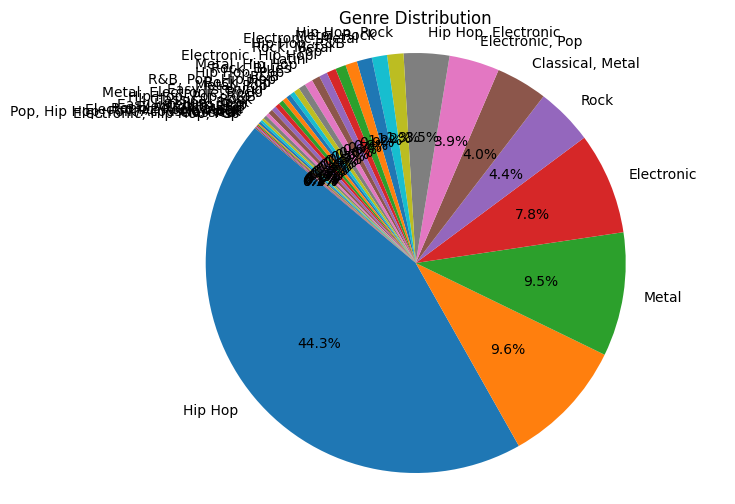

In [50]:
# Assuming 'Genres' column in the DataFrame represents the genres
genres_count = exam_df['Parent Genres'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(genres_count, labels=genres_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


DISPLAY THE ENERGY LEVELS OF EXAM DATE SONGS

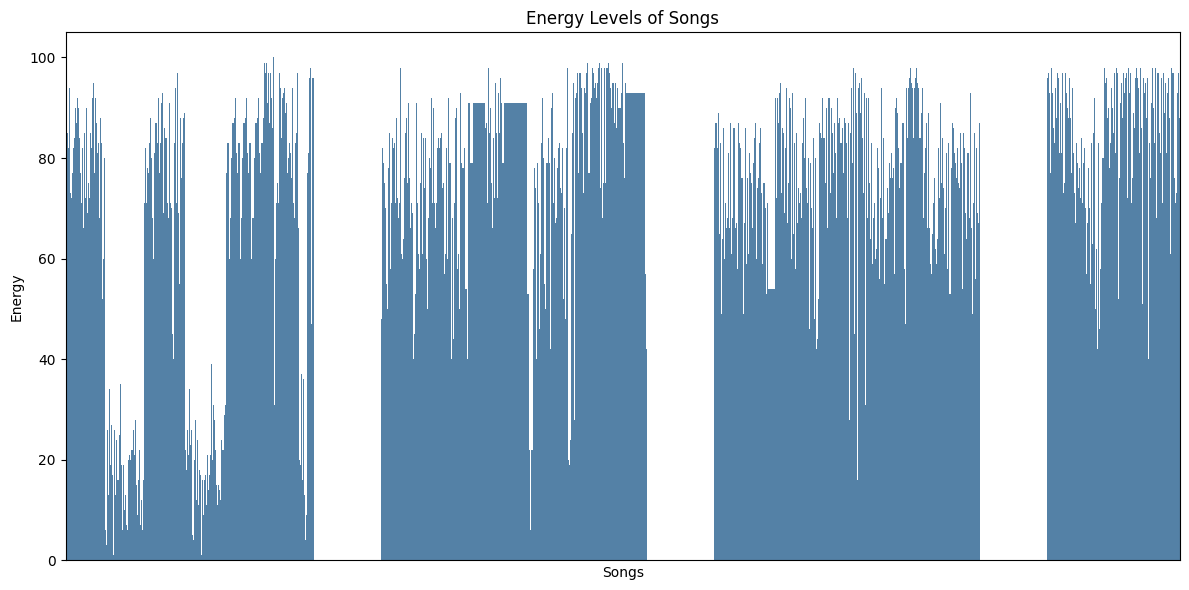

In [53]:
# Convert 'Energy' column to numeric (assuming it contains numeric values)
exam_df['Energy'] = pd.to_numeric(exam_df['Energy'], errors='coerce')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=exam_df.index, y='Energy', data=exam_df, color='steelblue')  # Use index for x-axis
plt.title('Energy Levels of Songs')
plt.xlabel('Songs')  # Empty x-axis label
plt.ylabel('Energy')
plt.xticks([])  # Remove x-axis ticks and labels

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
TOP 10 ARTIST, TRACK, ALBUM FOR NON-EXAM SONGS

In [54]:
# Filter out songs within exam date ranges to get non-exam songs
non_exam_songs = df[~df['timestamp'].between('2022-01-10', '2022-01-22', inclusive='both') & ~df['timestamp'].between('2022-06-11', '2022-06-24', inclusive='both')]

# Find the most occurring artist name, track name, and album name in the non-exam songs
non_top_artist_name = non_exam_songs['master_metadata_album_artist_name'].value_counts().head(10)
non_top_track_name = non_exam_songs['master_metadata_track_name'].value_counts().head(10)
non_top_album_name = non_exam_songs['master_metadata_album_album_name'].value_counts().head(10)

# Print the results
print("Top 10 Artist Names in Non-Exam Songs:")
print(non_top_artist_name)

print("\nTop 10 Track Names in Non-Exam Songs:")
print(non_top_track_name)

print("\nTop 10 Album Names in Non-Exam Songs:")
print(non_top_album_name)

Top 10 Artist Names in Non-Exam Songs:
master_metadata_album_artist_name
Sabaton              3081
Eminem               2458
Ati242               2107
2Pac                 1275
Pentakill            1199
SAMURAI               688
Gorillaz              508
Logic                 483
Lofi Fruits Music     418
50 Cent               404
Name: count, dtype: int64

Top 10 Track Names in Non-Exam Songs:
master_metadata_track_name
MASERATI FLOW                                                  226
9 MM                                                           222
WOW                                                            207
Burn Butcher Burn                                              197
Enemy (with JID) - from the series Arcane League of Legends    195
GÜNEŞ                                                          172
Lightbringer - Acoustic                                        170
PMC IN THE HOUSE                                               148
Black Dog                              

In [ ]:
TOP 10 ARTIST, TRACK, ALBUM FOR EXAM SONGS

In [55]:
# Find the most occurring artist name, track name, and album name in the non-exam songs
exam_top_artist_name = exam_df['Artist Name'].value_counts().head(10)
exam_top_track_name = exam_df['Song Name'].value_counts().head(10)
exam_top_album_name = exam_df['Album'].value_counts().head(10)

# Print the results
print("Top 10 Artist Names in Non-Exam Songs:")
print(exam_top_artist_name)

print("\nTop 10 Track Names in Non-Exam Songs:")
print(exam_top_track_name)

print("\nTop 10 Album Names in Non-Exam Songs:")
print(exam_top_album_name)

Top 10 Artist Names in Non-Exam Songs:
Artist Name
Eminem                                       109
Sabaton                                      103
Percival Schuttenbach,Marcin Przybyłowicz     43
Ati242                                        41
HAARPER                                       31
Logic,Wiz Khalifa                             20
Dorothy                                       18
Logic                                         15
NF                                            15
Massaka                                       13
Name: count, dtype: int64

Top 10 Track Names in Non-Exam Songs:
Song Name
    Silver For Monsters...                38
    Breath Control (feat. Wiz Khalifa)    19
    MASERATI FLOW                         11
    GÜNEŞ                                  9
    The Great Chinggis Khaan               9
    PMC IN THE HOUSE                       8
    KAPA GÖZLERİNİ                         8
    PAID MY DUES                           8
    NERDESİN            

SONGS THAT ARE SAME IN BOTH OF THE DATAFRAMES

In [58]:
# Preprocess column values for case-insensitive comparison and ignoring spaces
non_exam_songs = non_exam_songs.copy()
non_exam_songs['processed_track_name'] = non_exam_songs['master_metadata_track_name'].str.lower().str.replace(' ', '')

exam_df = exam_df.copy()
exam_df['processed_track_name'] = exam_df['Song Name'].str.lower().str.replace(' ', '')

# Find common songs based on processed track names
common_songs = set(non_exam_songs['processed_track_name']).intersection(set(exam_df['processed_track_name']))

# Print the number of common songs
print(f"Number of Common Songs: {len(common_songs)}")

# Optionally, you can print the list of common songs
print("\nList of Common Songs:")
print(common_songs)


Number of Common Songs: 378

List of Common Songs:
{'warrior', 'bruh...', 'aftermidnight', 'whynot', "chippin'in", 'spritesippin', 'toxic', 'midway', 'bleeditout', 'uprising', 'venom-remix', 'lonely', 'research', 'korsan', 'spacebound', 'reminiscence', 'inmyelement', 'tearsofscarlet', 'naga', 'thegoldenone', 'nouse', 'stan', 'isis', 'wintermeadow', 'блокировкапрокрутки', 'steelcommanders', 'rowdy', 'samefeelings', 'sourgrapes', 'uzak', 'sadbuttrue', 'heeltoe', 'mama/showlove(feat.ybncordae)', 'braindamage', 'archangel', 'stepdad', 'ifihad', 'adultswim(feat.originalgod&yungbitch)', 'howlingsilence', 'knight', 'therapysession', 'soldier', 'panzerbattalion', '$avedatmoney(feat.fettywap&richhomiequan)', 'themarchtowar-live,atwoodstockfestival', 'remedythisfailure', 'middleofthemall', 'theshowmustgoon', 'asslikethat', 'zero', 'voltage', 'abovethelaw', 'discombobulated', 'tornadoofsouls-2004remix', 'emerald', 'wolfpack', 'badmotherf*cker', 'greatest', 'southside', 'hdmi', "cleanin'outmyclose

SIMILARITY OF TWO DF'S BASED ON THE OCCURRENCE OF SAME SONGS

In [59]:
# Calculate Jaccard similarity
jaccard_similarity = len(common_songs) / len(set(non_exam_songs['processed_track_name']).union(set(exam_df['processed_track_name'])))

# Print the Jaccard similarity
print(f"Jaccard Similarity for Track Occurrences: {jaccard_similarity * 100:.2f}%")


Jaccard Similarity for Track Occurrences: 8.05%


OVERLAP OF SONGS BETWEEN NON-EXAM AND EXAM SONGS

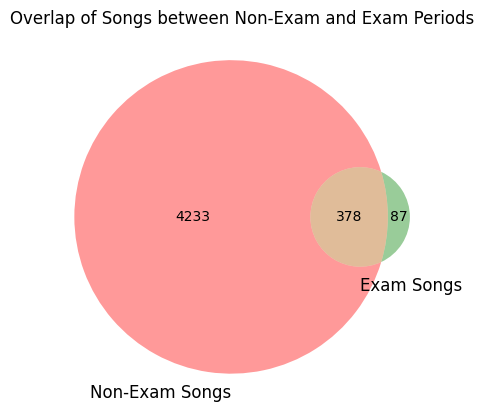

In [60]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Calculate the size of the intersection and set differences
intersection_size = len(common_songs)
non_exam_size = len(set(non_exam_songs['processed_track_name']))
exam_size = len(set(exam_df['processed_track_name']))

# Create a Venn diagram
venn2(subsets=(non_exam_size - intersection_size, exam_size - intersection_size, intersection_size),
      set_labels=('Non-Exam Songs', 'Exam Songs'))

# Display the plot
plt.title('Overlap of Songs between Non-Exam and Exam Periods')
plt.show()


PREDICT THE SONG LISTENING TIME FOR A FUTURE EXAM PERIOD

Mean Squared Error: 13925029155.217777


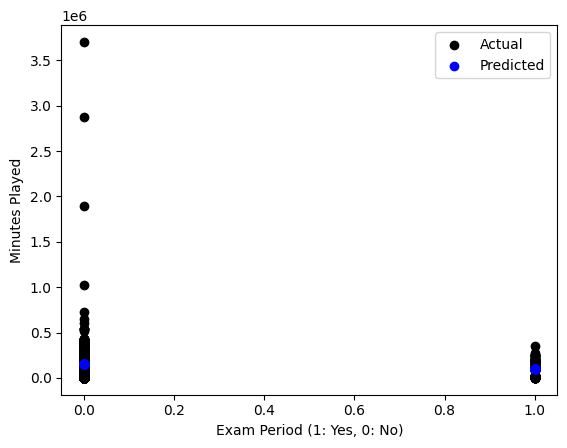

Predicted Minutes Played during the Future Exam Period: 157638.59791965567


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'timestamp' is the column containing the timestamp in your DataFrame
# 'ms_played' is the column indicating the duration of songs played
# 'exam_period' is a binary column indicating whether it's an exam period or not
# Replace these column names with the actual ones from your dataset
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['exam_period'] = df['timestamp'].between('2023-01-10', '2023-01-22', inclusive='both') | df['timestamp'].between('2023-06-11', '2023-06-24', inclusive='both')

# Create a binary column 'future_exam_period' for the future exam period you want to predict
future_exam_start = pd.to_datetime('2023-12-01')
future_exam_end = pd.to_datetime('2023-12-15')
df['future_exam_period'] = df['timestamp'].between(future_exam_start, future_exam_end, inclusive='both')

# Use 'ms_played' as the target variable (y) and 'exam_period' as the feature (X)
X = df[['exam_period']]
y = df['ms_played']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Exam Period (1: Yes, 0: No)')
plt.ylabel('Minutes Played')
plt.legend()
plt.show()

# Rename the column in the DataFrame
future_exam_data = future_exam_data.rename(columns={'future_exam_period': 'exam_period'})

# Now use the model to predict
future_minutes_predicted = model.predict(future_exam_data)


print(f'Predicted Minutes Played during the Future Exam Period: {future_minutes_predicted[0]}')
